### 1.) Import Neccessary Libraries NumPy, Pandas, JSON, GeoPY and Folium

In [1]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

!pip install geopy 
from geopy.geocoders import Nominatim 

import requests
from pandas.io.json import json_normalize 


import folium # map rendering library


     |████████████████████████████████| 112kB 5.1MB/s eta 0:00:01


### 2.) Retrieve Boston College and University CSV and create Dataframe listing each College located in Boston, the location coordinates and number of students

In [2]:
df = pd.read_csv('BostonCU.csv')
d1 = df[['Name', 'Latitude','Longitude', "NumStudents13"]]
d1.drop(d1.index[[57,58,59]])

,Name,Latitude,Longitude,NumStudents13
0,Massachusetts General Hospital Dietetic Intern...,42.362591,-71.070141,20
1,Suffolk University,42.358905,-71.061948,8675
2,Benjamin Franklin Institute of Technology,42.346103,-71.070186,482
3,Bunker Hill Community College,42.375117,-71.069572,14023
4,MGH Institute of Health Professions,42.374917,-71.053972,1096
5,Emmanuel College,42.341516,-71.103478,2436
6,School of the Museum of Fine Arts-Boston,42.338538,-71.096694,651
7,Simmons,42.339187,-71.099940,4900
8,Boston University,42.349560,-71.099709,32411
9,The Boston Conservatory,42.346058,-71.090011,774


### 3.) Create new dataframe for only schools with more than 5000 students

In [3]:
d2 = d1.sort_values(by = 'NumStudents13', ascending = False)
topschools = d2[d2['NumStudents13'] >= 5000 ]
topschools.reset_index(drop=True)


,Name,Latitude,Longitude,NumStudents13
0,Boston University,42.349560,-71.099709,32411
1,University of Massachusetts-Boston,42.313809,-71.039202,16277
2,Boston College,42.333833,-71.169719,14309
3,Bunker Hill Community College,42.375117,-71.069572,14023
4,Suffolk University,42.358905,-71.061948,8675
5,Northeastern University,42.340048,-71.088892,8479
6,MCPHS University,42.336880,-71.101120,6548


### 4.) Create a Visual Map of Boston with the Location Pop-ups for each college. 

In [4]:
address =   'Boston, MA'

geolocator = Nominatim(user_agent="b_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

42.3602534 -71.0582912


In [165]:
map_boston = folium.Map(location=[latitude, longitude], zoom_start=12)


for lat, lng, name in zip(topschools['Latitude'],topschools['Longitude'],topschools['Name'],):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=1,
        parse_html=False).add_to(map_boston)  
    
map_boston

### 5.) Leverage Foursquare API to retrive Top 10 Most Frequently Checked-In Venues located within a 500 meter radius of each College/University. This includes creating a function that will retrieve venues, type of venues (category) and their frequency in the 500 meter radius of each College/University and creating a dataframe that displays the results.

In [6]:
CLIENT_ID = 'YVRH3NSKVX3LENJPPXXZCZDSQ3BILN2JZP2W5MFLFPGN50R2' # your Foursquare ID
CLIENT_SECRET = '3AMGH3ME3UUH5ZSDGLTHKBCUP1TIC41AXPKKLQKL2XKKK3N4' # your Foursquare Secret
VERSION = '20200601'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)

print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YVRH3NSKVX3LENJPPXXZCZDSQ3BILN2JZP2W5MFLFPGN50R2
CLIENT_SECRET:3AMGH3ME3UUH5ZSDGLTHKBCUP1TIC41AXPKKLQKL2XKKK3N4


In [7]:
radius = 250
LIMIT = 100 
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=YVRH3NSKVX3LENJPPXXZCZDSQ3BILN2JZP2W5MFLFPGN50R2&client_secret=3AMGH3ME3UUH5ZSDGLTHKBCUP1TIC41AXPKKLQKL2XKKK3N4&ll=42.3602534,-71.0582912&v=20200601&radius=250&limit=100'

In [8]:
results = requests.get(url).json()


In [9]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['School', 
                  'School Latitude', 
                  'School Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [11]:
Bostonvenues = getNearbyVenues(names=topschools['Name'],
                                   latitudes=topschools['Latitude'],
                                   longitudes=topschools['Longitude']
                                  )
 

Boston University
University of Massachusetts-Boston
Boston College
Bunker Hill Community College
Suffolk University
Northeastern University
MCPHS University


In [12]:
b_onehot = pd.get_dummies(Bostonvenues[['Venue Category']], prefix="", prefix_sep="")

b_onehot['Name'] = Bostonvenues['School']


fixed_columns = [b_onehot.columns[-1]] + list(b_onehot.columns[:-1])
b_onehot =b_onehot[fixed_columns]

bgrouped = b_onehot.groupby('Name').mean().reset_index()
bgrouped


,Name,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beer Garden,Belgian Restaurant,Bookstore,Bowling Alley,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Stop,Café,Caribbean Restaurant,Chinese Restaurant,Circus,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Theater,Concert Hall,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Donut Shop,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Gastropub,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Historic Site,History Museum,Hockey Arena,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Library,Light Rail Station,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Museum,Music Venue,Neighborhood,New American Restaurant,Optical Shop,Other Repair Shop,Park,Pedestrian Plaza,Pet Store,Pharmacy,Pizza Place,Plaza,Pub,Record Shop,Restaurant,Roof Deck,Salad Place,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Souvenir Shop,Spa,Sports Bar,Steakhouse,Street Food Gathering,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tour Provider,Tourist Information Center,Trail,Train Station,Video Game Store,Wine Shop,Yoga Studio
0,Boston College,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.142857,0.000000,0.142857,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.142857,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.00000,0.00,0.00,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000
1,Boston University,0.058140,0.023256,0.000000,0.011628,0.000000,0.011628,0.011628,0.011628,0.011628,0.011628,0.023256,0.011628,0.00,0.00,0.00,0.011628,0.023256,0.000000,0.011628,0.011628,0.000000,0.023256,0.000000,0.000000,0.00,0.00,0.00,0.011628,0.046512,0.000000,0.000000,0.000000,0.011628,0.00,0.011628,0.011628,0.023256,0.000000,0.000000,0.011628,0.00,0.011628,0.011628,0.00,0.000000,0.00,0.00,0.011628,0.011628,0.023256,0.00,0.00,0.000000,0.023256,0.034884,0.00,0.000000,0.011628,0.011628,0.011628,0.011628,0.00,0.011628,0.00,0.00,0.00,0.000000,0.000000,0.05814,0.00,0.00,0.011628,0.000000,0.00,0.0,0.011628,0.011628,0.00,0.011628,0.00,0.000000,0.011628,0.000000,0.000000,0.023256,0.00,0.023256,0.011628,0.011628,0.011628,0.00,0.011628,0.00,0.011628,0.011628,0.00,0.000000,0.011628,0.000000,0.011628,0.011628,0.05814,0.00,0.00,0.023256,0.00,0.011628,0.011628,0.011628,0.011628,0.00,0.011628,0.011628,0.00,0.00,0.000000
2,Bunker Hill Community College,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.117647,0.000000,0.000000,0.058824,0.000000,0.00,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.058824,0.00,0.00,0.058824,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.058824,0.058824,0.00

In [118]:
num_top_venues = 10

for school in bgrouped['Name']:
    print("----"+school+"----")
    temp = bgrouped[bgrouped['Name'] == school].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Boston College----
                 venue  freq
0       Baseball Field  0.29
1    Convenience Store  0.14
2             Bus Stop  0.14
3      College Theater  0.14
4                 Café  0.14
5         Hockey Arena  0.14
6  American Restaurant  0.00
7    Other Repair Shop  0.00
8                 Park  0.00
9     Pedestrian Plaza  0.00


----Boston University----
                  venue  freq
0   American Restaurant  0.06
1                Lounge  0.06
2            Sports Bar  0.06
3           Coffee Shop  0.05
4                 Hotel  0.03
5               Brewery  0.02
6  Gym / Fitness Center  0.02
7         Hot Dog Joint  0.02
8            Donut Shop  0.02
9           Art Gallery  0.02


----Bunker Hill Community College----
                 venue  freq
0          Coffee Shop  0.12
1  American Restaurant  0.06
2      Thai Restaurant  0.06
3        Shopping Mall  0.06
4          Pizza Place  0.06
5             Pharmacy  0.06
6            Pet Store  0.06
7                 Park  0.06

In [166]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']


columns = ['School']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Popular Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Popular Venue'.format(ind+1))

# create a new dataframe
school_venues_sorted = pd.DataFrame(columns=columns)
school_venues_sorted['School'] = bgrouped['Name']

for ind in np.arange(bgrouped.shape[0]):
    school_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bgrouped.iloc[ind, :], num_top_venues)

school_venues_sorted

,School,1st Popular Venue,2nd Popular Venue,3rd Popular Venue,4th Popular Venue,5th Popular Venue,6th Popular Venue,7th Popular Venue,8th Popular Venue,9th Popular Venue,10th Popular Venue
0,Boston College,Baseball Field,College Theater,Convenience Store,Hockey Arena,Café,Bus Stop,Food Court,Cosmetics Shop,Deli / Bodega,Department Store
1,Boston University,American Restaurant,Lounge,Sports Bar,Coffee Shop,Hotel,Sushi Restaurant,Café,Pub,Gym / Fitness Center,Brewery
2,Bunker Hill Community College,Coffee Shop,Yoga Studio,Shopping Mall,Bank,Convenience Store,Donut Shop,Gastropub,Grocery Store,Light Rail Station,Liquor Store
3,MCPHS University,Coffee Shop,Sushi Restaurant,Sandwich Place,Convenience Store,Pizza Place,Pub,Donut Shop,Café,Falafel Restaurant,Gastropub
4,Northeastern University,Sandwich Place,Pizza Place,Grocery Store,Arts & Crafts Store,Middle Eastern Restaurant,Concert Hall,Café,Caribbean Restaurant,Burrito Place,Restaurant
5,Suffolk University,Coffee Shop,Historic Site,Seafood Restaurant,Mediterranean Restaurant,New American Restaurant,Hotel,Restaurant,American Restaurant,Market,Italian Restaurant
6,University of Massachusetts-Boston,Museum,Coffee Shop,Donut Shop,Fast Food Restaurant,Food Court,Concert Hall,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store


## Create New DataFrame and Pie Chart for Most Checked-In Venues within 500M of Boston College and have a value above 0%

In [145]:
temp = bgrouped[bgrouped['Name'] == 'Boston College'].T.reset_index()
temp.columns = ['Venue','Freq']
temp = temp.iloc[1:]
temp['Freq'] = temp['Freq'].astype(float)
temp = temp.round({'Freq': 2})
BC = temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues)
BC = BC.head(6)
BC.set_index('Venue')

,Freq
Venue,
Baseball Field,0.29
Convenience Store,0.14
Bus Stop,0.14
College Theater,0.14
Café,0.14
Hockey Arena,0.14


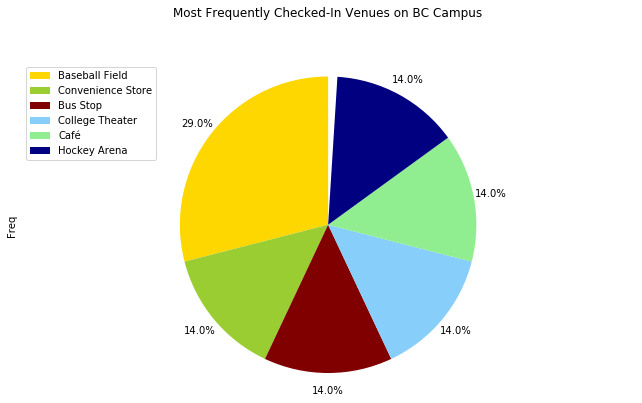

In [162]:
import matplotlib.pyplot as plt

colors_list = ['gold', 'yellowgreen', 'maroon', 'lightskyblue', 'lightgreen', 'navy']
explode_list = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0] # ratio for each continent with which to offset each wedge.

BC['Freq'].plot(kind='pie',
                            figsize=(11, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=False,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Most Frequently Checked-In Venues on BC Campus', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=BC['Venue'], loc='upper left') 

plt.show()